In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

# 지도 학습 알고리즘 : 선형 모델

## 회귀의 선형 모델

w[0]: 0.393906  b: -0.031804


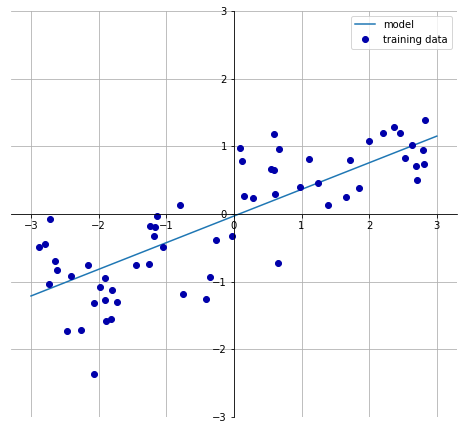

In [3]:
# wave 데이터셋으로 선형 모델을 학습
mglearn.plots.plot_linear_regression_wave()
# w[0]는 직선의 기울기(가중치), b는 y절편

## 선형 회귀(최소제곱법) : Linear regression(OLS, Ordinary Least Squares)
* 예측과 훈련 세트에 있는 타겟 y 사이의 평균제곱오차(mean squared error)를 최소화하는 파라미터 w와 b를 찾는다.
* `y = w[0]*x[0] + w[1]*x[1] + ... + w[p]*x[p] + b`
* 매개변수가 없는 것이 장점 but, 모델의 복잡도를 제어할 방법이 없음

In [6]:
# 선형 모델 생성
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# 선형 모델 학습
lr = LinearRegression().fit(X_train, y_train)

# 기울기 파라미터(w) - 가중치, 계수: lr 객체의 coef_ 속성에 저장
# 편향, 절편 파라미터(b): intercept_ 속성에 저장
print(f"lr.coef_: {lr.coef_}")
print(f"lr.intercept_: {lr.intercept_}")

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [8]:
# 훈련 세트와 테스트 세트의 정확도
print(f"훈련 세트 점수: {lr.score(X_train, y_train):.2f}")
print(f"테스트 세트 점수: {lr.score(X_test, y_test):.2f}")
# R^2 값이 0.66인 것은 좋은 결과는 아님 but, 훈련과 테스트 세트의 점수가 매우 비슷
# 이는 과대적합이 아니라 과소적합인 상태

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


In [9]:
# 선형 회귀 모델이 복잡한 데이터셋에서 어떻게 동작하는지 보자.
# 보스턴 주택가격 데이터셋 생성(샘플 506개, 특성 104개)
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# 선형 모델 학습
lr = LinearRegression().fit(X_train, y_train)

In [13]:
# 훈련 세트와 테스트 세트의 정확도
print(f"훈련 세트 점수: {lr.score(X_train, y_train):.2f}")
print(f"테스트 세트 점수: {lr.score(X_test, y_test):.2f}")
# 훈련과 테스트 세트 사이의 성능 차이는 모델이 과대적합(모델의 복잡도가 높음)인 상태를 보여줌

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


## 릿지 회귀
* 최소적합법과 같은 예측 함수를 사용
* 훈련 데이터를 잘 예측하기 위함 + 추가 제약 조건을 만족하기 위함 => 가중치의 절댓값을 가능한 한 작게 만든다.
* 즉 w의 모든 원소(각 특성에 대한 가중치)가 0에 가깝게 되도록 만든다. => 이런 제약을 규제(regularization)라 한다.(릿지는 L2 규제)

In [14]:
# 릿지 회귀 모델
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print(f"훈련 세트 점수: {ridge.score(X_train, y_train):.2f}")
print(f"테스트 세트 점수: {ridge.score(X_test, y_test):.2f}")

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


* Ridge는 모델을 단순하게(계수를 0에 가깝게) 해주고 훈련과 테스트 세트의 성능 사이를 절충할 수 있다.
* alpha 매개변수로 성능 대비 모델을 얼마나 단순화할지 지정할 수 있다.
* alpha 값을 높이면 계수를 0에 더 가깝게 만든다. => 훈련 세트의 성능은 나빠지지만 일반화에는 도움이 될 수 있다.
* alpah 값을 줄이면(계수 제한을 줄인다. => 제약이 풀린다.) 점점 선형 회귀 모델과 가까워진다.

In [15]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print(f"훈련 세트 점수: {ridge10.score(X_train, y_train):.2f}")
print(f"테스트 세트 점수: {ridge10.score(X_test, y_test):.2f}")

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


In [16]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print(f"훈련 세트 점수: {ridge01.score(X_train, y_train):.2f}")
print(f"테스트 세트 점수: {ridge01.score(X_test, y_test):.2f}")

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


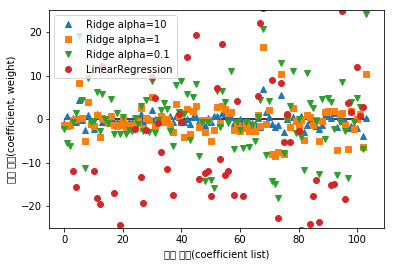

In [18]:
# alpha 값에 따른 모델의 coef_(w: 가중치) 비교
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록(coefficient list)")
plt.ylabel("계수 크기(coefficient, weight)")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

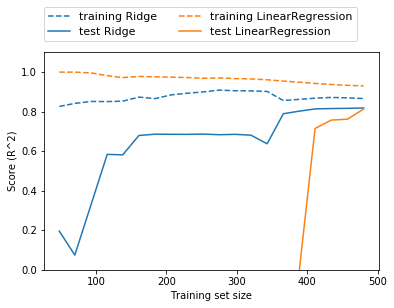

In [19]:
# 규제의 효과를 이해하는 또 다른 방법 - 훈련 데이터의 크기를 변화시켜본다.
# 학습 곡선(learning curve) - 데이터셋의 크기에 따른 모델의 성능 변화를 나타낸 그래프
mglearn.plots.plot_ridge_n_samples()

## 라쏘(Lasso)
* 릿지 회귀와 같이 계수를 0에 가깝게 만든다.
* 하지만 방식이 조금 다르며 L1 규제라고 한다.
* 라쏘를 이용하면 어떤 계수는 실제로 0이 된다. => 해당 특성을 제외한다.
* 따라서 모델을 이해하기 쉬워지고 이 모델의 가장 중요한 특성이 무엇인지 드러내준다.

In [20]:
# 라쏘를 이용한 보스턴 주택가격 데이터셋 훈련
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print(f"훈련 세트 점수: {lasso.score(X_train, y_train):.2f}")
print(f"테스트 세트 점수: {lasso.score(X_test, y_test):.2f}")
print(f"사용한 특성의 수: {np.sum(lasso.coef_ != 0)}")
# 훈련과 데이터 세트의 정확도가 매우 낮다 => 과소적합(모델의 복잡도가 낮음)
# 104개 중 4개의 특성만 사용

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 수: 4


In [23]:
# 릿지와 마찬가지로 alpha 매개변수를 사용할 수 있다.
# 과소적합이므로 alpha 값을 줄인다.
# "max_iter" 기본값을 증가시키지 않으면 max_iter 값을 늘리라는 경고가 발생한다.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print(f"훈련 세트 점수: {lasso001.score(X_train, y_train):.2f}")
print(f"테스트 세트 점수: {lasso001.score(X_test, y_test):.2f}")
print(f"사용한 특성의 수: {np.sum(lasso001.coef_ != 0)}")
# alpha 값을 낮추면 모델의 복잡도 증가
# 그래도 사용된 특성이 104개 중 33개뿐이므로 모델을 분석하기가 더 쉬움

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 수: 33


In [24]:
# alpha 값을 너무 낮추면 LinearRegression에 가까워짐
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print(f"훈련 세트 점수: {lasso00001.score(X_train, y_train):.2f}")
print(f"테스트 세트 점수: {lasso00001.score(X_test, y_test):.2f}")
print(f"사용한 특성의 수: {np.sum(lasso00001.coef_ != 0)}")

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 수: 96


Text(0, 0.5, '계수 크기(coefficient, weight)')

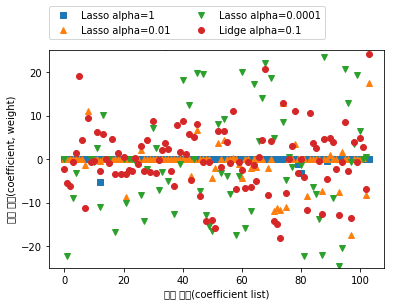

In [25]:
# alpha 값에 따른 모델의 coef_(w: 가중치) 비교
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Lidge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("계수 목록(coefficient list)")
plt.ylabel("계수 크기(coefficient, weight)")

## 분류용 선형 모델
* 이진 분류에서 선형 모델의 예측을 위한 방정식이 선형 회귀와 비슷하다.
* 하지만 특성들의 가중치 합을 그냥 사용하지 않고 임계치 0과 비교한다.
* `y = w[0]*x[0] + w[1]*x[1] + ... + w[p]*x[p] + b > 0`
* 이 값이 0보다 작으면 클래스를 -1, 0보다 크면 클래스를 +1이라고 예측한다.
* 따라서 분류용 선형 모델에서는 결정 경계가 입력의 선형 함수이다.
* 가장 널리 알려진 선형 분류 알고리즘은 로지스틱 회귀(Logistic Regression), 선형 서포트 벡터 머신(SVM, Support Vector Machine)

## 로지스틱 회귀

c:\users\student\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
c:\users\student\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\student\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


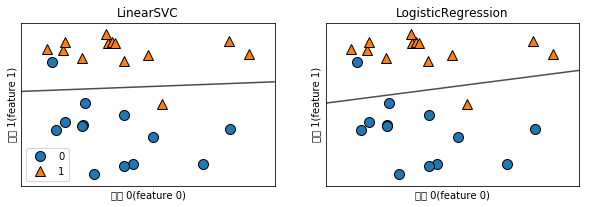

In [26]:
# forge 데이터셋을 사용한 로지스틱 회귀와 서포트 벡터 머신
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(f"{clf.__class__.__name__}")
    ax.set_xlabel("특성 0(feature 0)")
    ax.set_ylabel("특성 1(feature 1)")
axes[0].legend()

* 이 두 모델은 Ridge와 마찬가지로 L2 규제를 사용한다.
* 이 두 모델에서 규제의 강도를 결정하는 매개변수는 C(C가 높아지면 규제가 감소)
* 달리 말하면 C가 높아지면 훈련 세트에 최대한 맞추려 하고, C가 작아지면 계수 벡터(w)가 0에 가까워지도록 만든다.

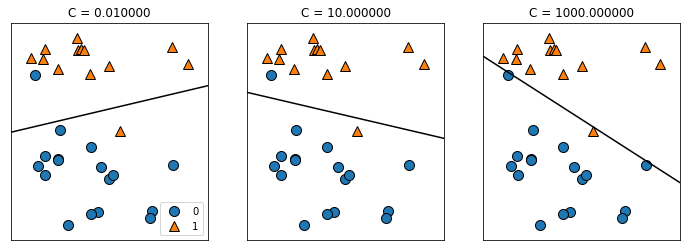

In [28]:
# C 값에 따른 선형 SVM 모델의 결정 경계
mglearn.plots.plot_linear_svc_regularization()
# 오른쪽의 경우 과대적합

In [32]:
# 유방암 데이터셋을 이용한 로지스틱 회귀
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print(f"훈련 세트 점수: {logreg.score(X_train, y_train):.3f}")
print(f"테스트 세트 점수: {logreg.score(X_test, y_test):.3f}")
# 훈련과 테스트 세트 모두 정확도가 높아 성능은 좋지만 둘의 정확도가 매우 비슷하므로 과소적합

훈련 세트 점수: 0.953
테스트 세트 점수: 0.958


c:\users\student\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [34]:
# C = 100인 모델(모델의 복잡도 증가)
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print(f"훈련 세트 점수: {logreg100.score(X_train, y_train):.3f}")
print(f"테스트 세트 점수: {logreg100.score(X_test, y_test):.3f}")

훈련 세트 점수: 0.972
테스트 세트 점수: 0.965


c:\users\student\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [36]:
# C = 0.01인 모델(모델의 복잡도 감소)
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print(f"훈련 세트 점수: {logreg001.score(X_train, y_train):.3f}")
print(f"테스트 세트 점수: {logreg001.score(X_test, y_test):.3f}")
# 이미 과소적합이었기 때문에 C가 더 작아지면 정확도도 더 낮아짐

훈련 세트 점수: 0.934
테스트 세트 점수: 0.930


c:\users\student\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


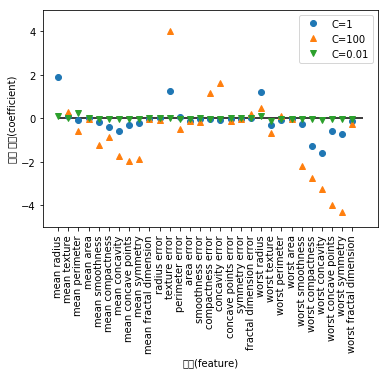

In [38]:
# 규제 매개변수 C 값에 따른 모델의 계수 비교
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("특성(feature)")
plt.ylabel("계수 크기(coefficient)")
plt.legend()

c:\users\student\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\student\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\student\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C=0.01인 l1 로지스틱 회귀의 훈련 정확도: 0.918
C=0.01인 l1 로지스틱 회귀의 테스트 정확도: 0.930
C=1.00인 l1 로지스틱 회귀의 훈련 정확도: 0.960
C=1.00인 l1 로지스틱 회귀의 테스트 정확도: 0.958
C=100.00인 l1 로지스틱 회귀의 훈련 정확도: 0.986
C=100.00인 l1 로지스틱 회귀의 테스트 정확도: 0.979


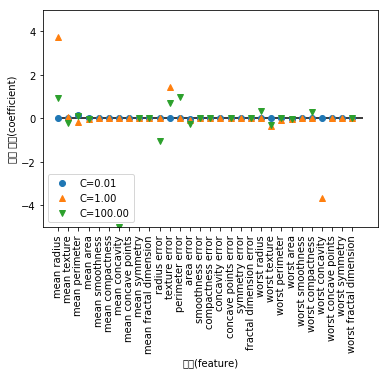

In [39]:
# L1 규제를 이용한 로지스틱 회귀
for C, marker in zip([0.01, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print(f"C={C:.2f}인 l1 로지스틱 회귀의 훈련 정확도: {lr_l1.score(X_train, y_train):.3f}")
    print(f"C={C:.2f}인 l1 로지스틱 회귀의 테스트 정확도: {lr_l1.score(X_test, y_test):.3f}")
    plt.plot(lr_l1.coef_.T, marker, label=f"C={C:.2f}")
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("특성(feature)")
plt.ylabel("계수 크기(coefficient)")

plt.ylim(-5, 5)
plt.legend(loc=3)

## 다중 클래스 분류용 선형 모델
* 많은 선형 분류 모델은 이진 분류만을 지원한다.(로지스틱 회귀 제외)
* 즉, 다중 클래스(multiclass)를 지원하지 않는다.
* 이진 분류 알고리즘을 다중 클래스 분류 알고리즘으로 확장하는 방법은 일대다(one-vs,-rest) 방법이다.
* 이는 각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델을 학습시킨다.
* 이렇게 만들어진 모든 이진 분류기가 작동하여 가장 높은 점수를 내는 분류기의 클래스를 예측값으로 선택한다.
* `y = w[0]*x[0] + w[1]*x[1] + ... + w[p]*x[p] + b` 공식의 결과값이 가장 높은 클래스 레이블로 할당된다.

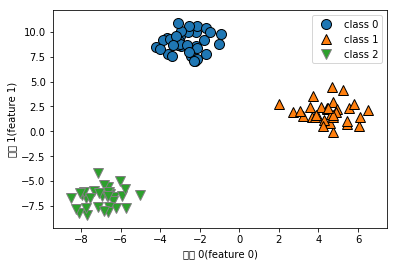

In [40]:
# 3개의 클래스를 가진 간단한 데이터셋(각 클레스의 데이터는 정규분포를 따른다.)에 적용
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0(feature 0)")
plt.ylabel("특성 1(feature 1)")
plt.legend(["class 0", "class 1", "class 2"])

In [43]:
# 위 데이터셋으로 LinearSVC 훈련
linear_svm = LinearSVC().fit(X, y)
print("계수 배열의 크기: ", linear_svm.coef_.shape)
print("절편 배열의 크기: ", linear_svm.intercept_.shape)
# coef_의 행은 세 개의 클래스에 각각 대응하는 계수 벡터, 열은 각 특성에 따른 계수 값
# intercept_는 각 클래스의 절편을 담은 1차원 벡터

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


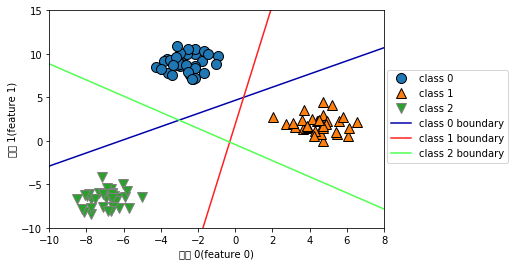

In [44]:
# 3개의 이진 분류기가 만드는 경계를 시각화
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성 0(feature 0)")
plt.ylabel("특성 1(feature 1)")
plt.legend(["class 0", "class 1", "class 2", "class 0 boundary", "class 1 boundary", "class 2 boundary"], loc=(1.01, 0.3))

Text(0, 0.5, '특성 1(feature 1)')

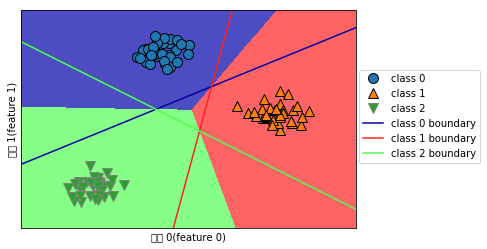

In [45]:
# 2차원 평면의 모든 포인트에 대한 예측 결과
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(["class 0", "class 1", "class 2", "class 0 boundary", "class 1 boundary", "class 2 boundary"], loc=(1.01, 0.3))
plt.xlabel("특성 0(feature 0)")
plt.ylabel("특성 1(feature 1)")

## 장단점과 매개변수
* 선형 모델의 주요 매개변수는 회귀 모델에서 alpha, 분류 이진 모델에서 C
* alpha가 클 수록, C가 작을 수록 모델이 단순해진다.
* 보통 C와 alpha는 로그 스케일로 최적치를 정한다.
* L1 규제를 사용할지 L2 규제를 사용할지 정해야한다.(중요한 특성이 많으면 L2, 그렇지 않으면 L1)
* 선형 모델은 학습 속도가 빠르고 예측도 빠르다.
* 예측이 어떻게 만들어지는지 비교적 쉽게 이해할 수 있다.
* 샘플에 비해 특성이 많을 때 잘 작동한다.(저차원의 데이터셋에는 다른 모델들의 일반화 성능이 더 좋다.)